# Concatenate Raw Data

Psytoolkit's data management appears unreliable, as such all downloaded data should be stored both locally & on Git (without assuming the Psytoolkit portal will maintain these files).

This notebook processes many data files:

- Read all subfiles
- Identify unique participant codes (experiments)
- Return a table to map to all unique experiments


This notebook is also used to consider the distribution of times for estimating cost on Amazon Mechanical Turk.


```
author: Zach Wolpe
email:  zachcolinwolpe@gmail.com
```

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

# Identify Unique Paths

Here we indentify all unique experiments & produce a dataframe to 

In [15]:
path     = '../data/all data files'
inc_beta = True

final_data = None; final_data_times = None
for d in os.listdir(path):
    if '.DS_Store' not in d:
        if ('beta' not in d) or ('beta' in d) == inc_beta:
            data       = pd.read_csv(path + '/' + d + '/data.csv',       index_col=False)
            data_times = pd.read_csv(path + '/' + d + '/data_times.csv', index_col=False)
            # --- add columns ---x
            data[['path']]       = path + '/' + d
            data_times[['path']] = path + '/' + d
            data[['beta']]       = ('beta' in d)
            data_times[['beta']] = ('beta' in d)
            if final_data is None:
                final_data       = data
                final_data_times = data_times
            else:
                final_data = final_data.append(data, ignore_index=True)
                final_data_times = final_data_times.append(data_times, ignore_index=True)
    

print('final_data.shape: ', final_data.shape)
final_data.head(2)

final_data.shape:  (26, 14)


,participant,participant_code:1,Welcome_Screen:1,wcst_task:1,n_back_task:1,corsi_block_span_task:1,fitts_law:1,navon_task:1,TIME_start,TIME_end,TIME_total,path,beta,backward_corsi:1
0,s.32ff642a-efe0-436f-8075-fa703d677fed.txt,851366,welcome_screen.2021-05-01-1551.data.32ff642a-e...,WCST_Task.2021-05-01-1558.data.32ff642a-efe0-4...,N_Back_Task.2021-05-01-1604.data.32ff642a-efe0...,Corsi_Block_Span_Task.2021-05-01-1605.data.32f...,Fitts_Law.2021-05-01-1606.data.32ff642a-efe0-4...,Navon_Task.2021-05-01-1609.data.32ff642a-efe0-...,2021-05-01-15-50,2021-05-01-16-09,19.0,../data/all data files/data 17 May,False,NaN
1,s.88be81bb-b23f-4c34-b7ad-18cce2be5cb9.txt,904653,welcome_screen.2021-05-13-1543.data.88be81bb-b...,NaN,NaN,NaN,NaN,NaN,2021-05-13-15-43,NaN,NaN,../data/all data files/data 17 May,False,NaN


# Identify Duplicates

In [16]:
# ---- remove incomplete files ----x
final_data       = final_data.loc[final_data['TIME_total'].notnull(),]    
print('final_data.shape: ', final_data.shape)
final_data.head(2)

final_data.shape:  (17, 14)


,participant,participant_code:1,Welcome_Screen:1,wcst_task:1,n_back_task:1,corsi_block_span_task:1,fitts_law:1,navon_task:1,TIME_start,TIME_end,TIME_total,path,beta,backward_corsi:1
0,s.32ff642a-efe0-436f-8075-fa703d677fed.txt,851366,welcome_screen.2021-05-01-1551.data.32ff642a-e...,WCST_Task.2021-05-01-1558.data.32ff642a-efe0-4...,N_Back_Task.2021-05-01-1604.data.32ff642a-efe0...,Corsi_Block_Span_Task.2021-05-01-1605.data.32f...,Fitts_Law.2021-05-01-1606.data.32ff642a-efe0-4...,Navon_Task.2021-05-01-1609.data.32ff642a-efe0-...,2021-05-01-15-50,2021-05-01-16-09,19.0,../data/all data files/data 17 May,False,NaN
3,s.d3b74af9-3b24-4820-83a0-67986b3ec0bf.txt,490901,welcome_screen.2021-05-10-0639.data.d3b74af9-3...,WCST_Task.2021-05-10-0647.data.d3b74af9-3b24-4...,N_Back_Task.2021-05-10-0652.data.d3b74af9-3b24...,Corsi_Block_Span_Task.2021-05-10-0654.data.d3b...,Fitts_Law.2021-05-10-0655.data.d3b74af9-3b24-4...,Navon_Task.2021-05-10-0657.data.d3b74af9-3b24-...,2021-05-10-06-39,2021-05-10-06-57,18.0,../data/all data files/data 17 May,False,NaN


In [76]:
# plot lablels
xticks = ['Testing','Actual']
final_data['beta_plot'] = None
final_data.beta_plot[final_data.beta==True]  = xticks[0]
final_data.beta_plot[final_data.beta==False] = xticks[1]

<ipython-input-76-ec1246302bab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.beta_plot[final_data.beta==True]  = xticks[0]
<ipython-input-76-ec1246302bab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.beta_plot[final_data.beta==False] = xticks[1]




Battery Task Times:


Testing Samplings:  13
Actual Samplings:   4


Testing Mean:  20.384615384615383
Actual Mean:   18.5




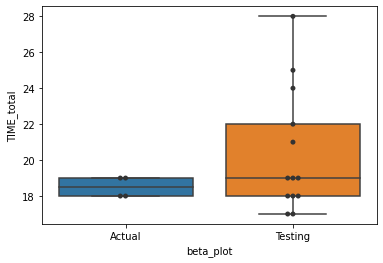

In [81]:
print('');print('')
print('Battery Task Times:')
print('');print('')
print('Testing Samplings: ', sum(final_data.beta==True))
print('Actual Samplings:  ', sum(final_data.beta==False))
print('');print('')

print('Testing Mean: ', np.mean(final_data.TIME_total[final_data.beta==True]))
print('Actual Mean:  ', np.mean(final_data.TIME_total[final_data.beta==False]))
print('');print('')

sns.boxplot(x='beta_plot', y='TIME_total', data=final_data, dodge=False)
sns.swarmplot(x='beta_plot', y='TIME_total', data=final_data, dodge=False, color='.2');